# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with OpenAI Gym's BipedalWalker-v2 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import numpy as np
import random
import copy
from collections import namedtuple, deque
from replay_buffer import ReplayBuffer

import tensorflow as tf
from keras import backend as K
from keras.layers import Dense, Input, Add, Activation,LeakyReLU
from keras.layers import GaussianNoise, Dropout, Concatenate
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent
from BFSWorld import BFSWorldEnv
from infoCalc import *

Using TensorFlow backend.


### 2. Instantiate the Environment and Agent

In [2]:
sess = tf.Session()
K.set_session(sess)

env = BFSWorldEnv()
env.seed(10)
print(env.action_space.shape[0])
agent = Agent(env, sess,state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], random_seed=10)
#agent.NetworkSummary()
agent.load_network('savedModels/', 'saved.h5')

4
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Successfully saved network.


### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

In [3]:
MaxT=4
def ddpg(n_episodes=500, max_t=MaxT):
    scores_deque = deque(maxlen=50)
    scores = []
    max_score = -np.Inf
    cnt=1
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        #agent.reset()

        score = 0
        for t in range(max_t):
            #print(t,len(env.StateBuffer),state,score)
            action = agent.act(state,env.NumberOfPartitions(2))
            #print(t,len(env.StateBuffer),state,score,action)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            #print(score)
            #env.render()
            if done:
                #print("done",done)
                break 
        #env.render()
        scores_deque.append(score)
        scores.append(score)
        #env.render()
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 50 == 0:
            agent.save_network('savedModels/', 'saved'+str(cnt)+'.h5')
            cnt=cnt+1
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            #state = env.reset()
            
        
        
    agent.save_network('savedModels/', 'savedF.h5')
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 50	Average Score: 1841.26	Score: 2219.00
Episode 100	Average Score: 2129.06	Score: 2048.63
Episode 150	Average Score: 1862.62	Score: 364.215
Episode 165	Average Score: 1380.47	Score: 342.28

KeyboardInterrupt: 

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

Successfully saved network.


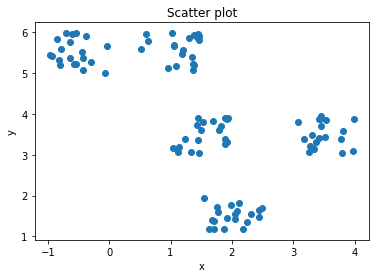

16.41896138428691
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.6677827 , 0.22950283, 0.1027144 , 0.9510446 ], dtype=float32))


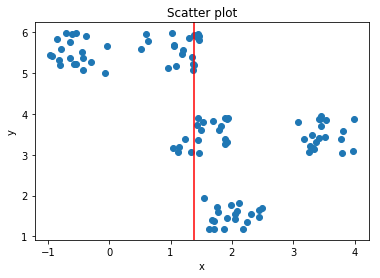

311.71340650285373
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.6677827 , 0.22950283, 0.1027144 , 0.9510446 ], dtype=float32))
StateAction(state=array([[1.37761155, 4.        ],
       [1.        , 6.        ]]), action=array([0.00345375, 0.6173273 , 0.37921894, 1.2460098 ], dtype=float32))


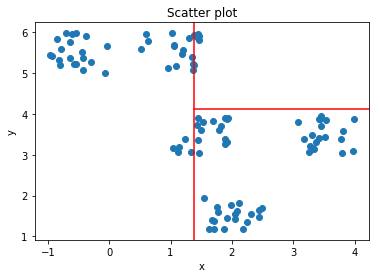

1727.2138042015872
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.6677827 , 0.22950283, 0.1027144 , 0.9510446 ], dtype=float32))
StateAction(state=array([[1.37761155, 4.        ],
       [1.        , 6.        ]]), action=array([0.00345375, 0.6173273 , 0.37921894, 1.2460098 ], dtype=float32))
StateAction(state=array([[-1.        ,  1.37761155],
       [ 1.        ,  6.        ]]), action=array([0.19633843, 0.75047183, 0.05318975, 1.6304357 ], dtype=float32))


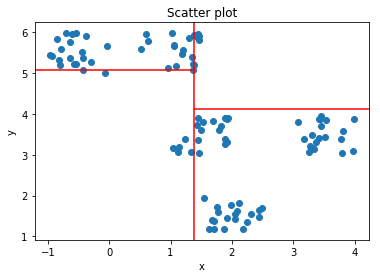

-5.280859157443047
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.6677827 , 0.22950283, 0.1027144 , 0.9510446 ], dtype=float32))
StateAction(state=array([[1.37761155, 4.        ],
       [1.        , 6.        ]]), action=array([0.00345375, 0.6173273 , 0.37921894, 1.2460098 ], dtype=float32))
StateAction(state=array([[-1.        ,  1.37761155],
       [ 1.        ,  6.        ]]), action=array([0.19633843, 0.75047183, 0.05318975, 1.6304357 ], dtype=float32))


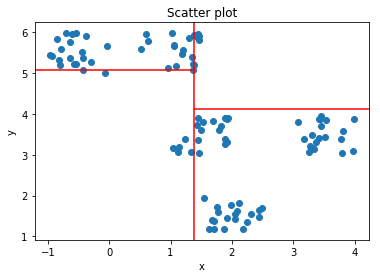

-5.373575687408447
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.6677827 , 0.22950283, 0.1027144 , 0.9510446 ], dtype=float32))
StateAction(state=array([[1.37761155, 4.        ],
       [1.        , 6.        ]]), action=array([0.00345375, 0.6173273 , 0.37921894, 1.2460098 ], dtype=float32))
StateAction(state=array([[-1.        ,  1.37761155],
       [ 1.        ,  6.        ]]), action=array([0.19633843, 0.75047183, 0.05318975, 1.6304357 ], dtype=float32))


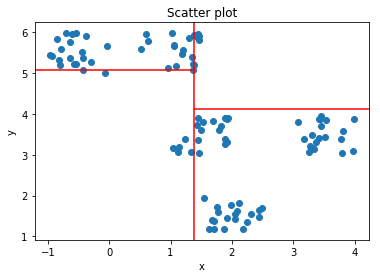

-5.052204728126526
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.6677827 , 0.22950283, 0.1027144 , 0.9510446 ], dtype=float32))
StateAction(state=array([[1.37761155, 4.        ],
       [1.        , 6.        ]]), action=array([0.00345375, 0.6173273 , 0.37921894, 1.2460098 ], dtype=float32))
StateAction(state=array([[-1.        ,  1.37761155],
       [ 1.        ,  6.        ]]), action=array([0.19633843, 0.75047183, 0.05318975, 1.6304357 ], dtype=float32))


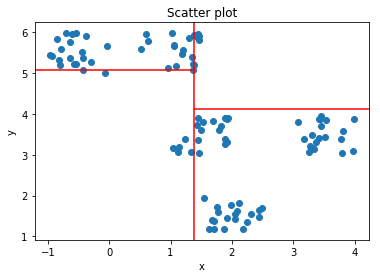

-4.997093960642815
Simulation Over


In [5]:
agent.load_network('savedModels/', 'saved2.h5')
state = env.reset()
   
for t in range(16):
    action = agent.act(state,False)
    env.render()
    next_state, reward, done, _ = env.step(action)
    print(reward)
    state = next_state
    if done:
        break
        
env.close()

### 5. Explore

In this exercise, we have provided a sample DDPG agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster than this benchmark implementation.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task!
- Write your own DDPG implementation.  Use this code as reference only when needed -- try as much as you can to write your own algorithm from scratch.
- You may also like to implement prioritized experience replay, to see if it speeds learning.  
- The current implementation adds Ornsetein-Uhlenbeck noise to the action space.  However, it has [been shown](https://blog.openai.com/better-exploration-with-parameter-noise/) that adding noise to the parameters of the neural network policy can improve performance.  Make this change to the code, to verify it for yourself!
- Write a blog post explaining the intuition behind the DDPG algorithm and demonstrating how to use it to solve an RL environment of your choosing.  